<a href="https://colab.research.google.com/github/Mukiti-Ryan/Fake_News_Prediction/blob/main/Fake_News.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This model has the following statistics
---
Accuracy of 92.66%

587 true positives

587 true negatives

42 false positives

51 false negatives

Install Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

Read Data into DataFrame

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/news.csv')

df.shape
df.head()

,Unnamed: 0,title,text,label
0,8476,You Can Smell Hillary’s Fear,"Daniel Greenfield, a Shillman Journalism Fello...",FAKE
1,10294,Watch The Exact Moment Paul Ryan Committed Pol...,Google Pinterest Digg Linkedin Reddit Stumbleu...,FAKE
2,3608,Kerry to go to Paris in gesture of sympathy,U.S. Secretary of State John F. Kerry said Mon...,REAL
3,10142,Bernie supporters on Twitter erupt in anger ag...,"— Kaydee King (@KaydeeKing) November 9, 2016 T...",FAKE
4,875,The Battle of New York: Why This Primary Matters,It's primary day in New York and front-runners...,REAL


Get labels from DataFrame

In [ ]:
labels = df.label
labels.head()

0    FAKE
1    FAKE
2    REAL
3    FAKE
4    REAL
Name: label, dtype: object

Split dataset into training and testing sets

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(df['text'], labels, test_size = 0.2, random_state = 7)

Initialize TfidfVectorizer with stopwords.

Fit and transform the vectorizer on the train set and transform the vectorizer on the test set

In [ ]:
tfidf_vectorizer = TfidfVectorizer(stop_words = 'english', max_df = 0.7)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test = tfidf_vectorizer.transform(x_test)

Initialize PassiveAggressiveClassifier and fit this on the tfidf_train and y_train

Then predict on the test set from the TfidfVectorizer and calculate accuracy with accuracy_score

In [ ]:
pac = PassiveAggressiveClassifier(max_iter = 50)
pac.fit(tfidf_train, y_train)

y_pred = pac.predict(tfidf_test)
score = accuracy_score(y_test, y_pred)
print(f'Accuracy: {round(score * 100, 2)} %')

Accuracy: 92.66 %


Print out confusion matrix to gain insight on the number of false and true negatives and positives

In [ ]:
confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])

array([[587,  51],
       [ 42, 587]])

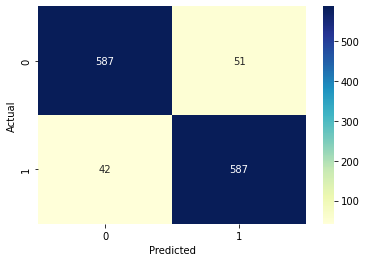

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels = ['FAKE', 'REAL'])
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'YlGnBu')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [ ]:
print(metrics.classification_report(y_test, y_pred, target_names = df['label'].unique()))

              precision    recall  f1-score   support

        FAKE       0.93      0.92      0.93       638
        REAL       0.92      0.93      0.93       629

    accuracy                           0.93      1267
   macro avg       0.93      0.93      0.93      1267
weighted avg       0.93      0.93      0.93      1267

